# 🟩⬜🟥 COVID-19 Italy Analysis 🟩⬜🟥

In [1]:
# Importing the tools and the datasets
try:
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import plotly
    import plotly.express as px
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    import logging, sys
    logging.disable(sys.maxsize)

    # Set a default file path
    DATA_PATH = "data/"
    FIGS_PATH = "figs/"

    # Import the datasets
    df_naz = pd.read_csv(DATA_PATH+"dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv",
                         parse_dates=["data"])
    df_naz_latest = pd.read_csv(DATA_PATH+"dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale-latest.csv",
                                parse_dates=["data"])
    df_reg = pd.read_csv(DATA_PATH+"dati-regioni/dpc-covid19-ita-regioni.csv",
                         parse_dates=["data"])
    df_reg_latest = pd.read_csv(DATA_PATH+"dati-regioni/dpc-covid19-ita-regioni-latest.csv",
                                parse_dates=["data"])
    df_prov = pd.read_csv(DATA_PATH+"dati-province/dpc-covid19-ita-province.csv",
                          parse_dates=["data"])
    df_prov_latest = pd.read_csv(DATA_PATH+"dati-province/dpc-covid19-ita-province-latest.csv",
                                 parse_dates=["data"])
    print("Successful Import of Tools and Datasets.")
except:
    print("Error in Import of Tools and Datasets, try again.")

Successful Import of Tools and Datasets.


## Same important information about COVID-19 in Italy

In [2]:
print(f"Total number of Confirmed COVID 2019 cases across Italy:            {df_naz.totale_casi[len(df_naz)-1]}")
print(f"Total number of Active COVID 2019 cases across Italy:               {df_naz.totale_positivi[len(df_naz)-1]}")
print(f"Total number of Discharged Healed COVID 2019 cases across Italy:    {df_naz.dimessi_guariti[len(df_naz)-1]}")
print(f"Total number of Death due to COVID 2019 across Italy:               {df_naz.deceduti[len(df_naz)-1]}")
print(f"Total number ICU People due to COVID 2019 across Italy:             {df_naz.terapia_intensiva[len(df_naz)-1]}")
print(f"Total numebr of Used Swabs due to COVID 2019 across Italy:          {df_naz.tamponi[len(df_naz)-1]}")

Total number of Confirmed COVID 2019 cases across Italy:            110574
Total number of Active COVID 2019 cases across Italy:               80572
Total number of Discharged Healed COVID 2019 cases across Italy:    16847
Total number of Death due to COVID 2019 across Italy:               13155
Total number ICU People due to COVID 2019 across Italy:             4035
Total numebr of Used Swabs due to COVID 2019 across Italy:          541423


## Trend of COVID 2019 in Italy

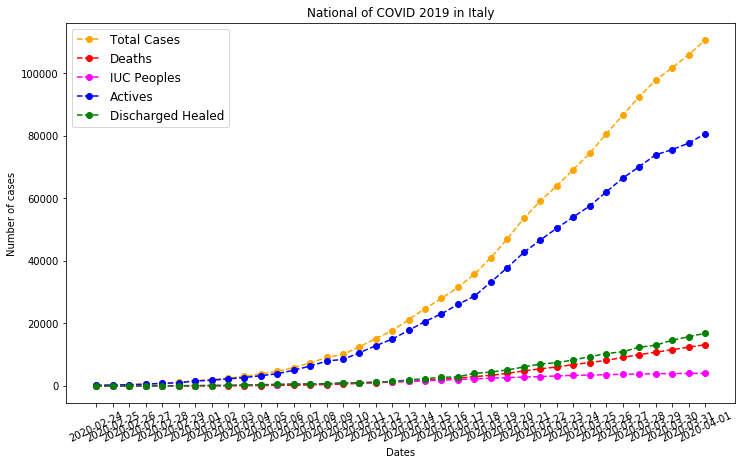

In [3]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(df_naz.data, df_naz.totale_casi, c="orange", label="Total Cases", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.deceduti, c="red", label="Deaths", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.terapia_intensiva, c="magenta", label="IUC Peoples", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.totale_positivi, c="blue", label="Actives", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.dimessi_guariti, c="green", label="Discharged Healed", linestyle="--", marker="o")
ax.legend(prop={"size": 12})
ax.set_title("National of COVID 2019 in Italy")
ax.set_xlabel("Dates")
ax.set_ylabel("Number of cases")

# Create a unique xticks dates list
xticks_list = [d for idx, d in enumerate(df_naz.data)]
plt.xticks(xticks_list, rotation=25)

fig.savefig(FIGS_PATH+"trend-of-covid-19-in-italy.png")
plt.show()

## Trend of COVID 2019 in Italy with Logaritmic Scale (Deaths, Actives, Total Cases)

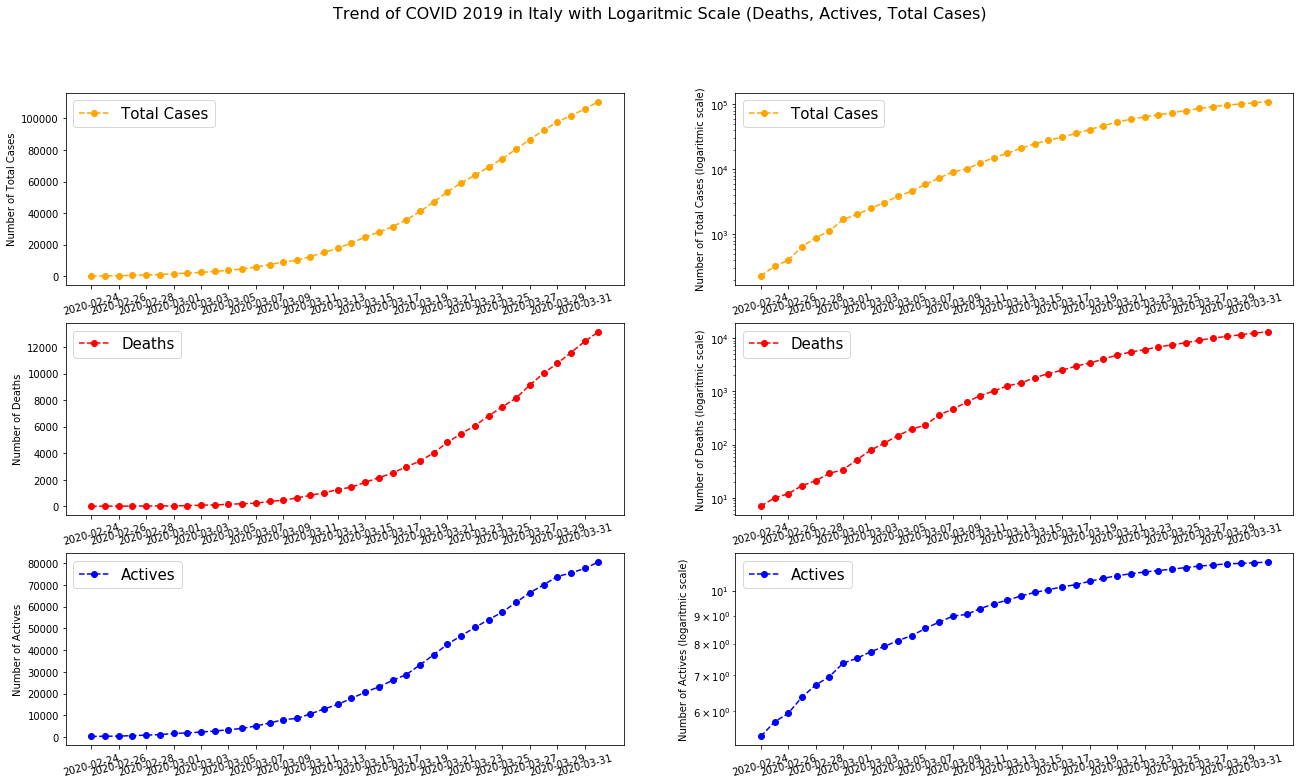

In [4]:
# Create a unique list of dates for xlabel
xticks_list = [d for idx, d in enumerate(df_naz.data) if idx % 2 == 0]

fig = plt.figure(figsize=(22, 12))

fig.suptitle('Trend of COVID 2019 in Italy with Logaritmic Scale (Deaths, Actives, Total Cases)', fontsize=16)

ax0 = plt.subplot(3, 2, 1)
ax0.plot(df_naz.data, df_naz.totale_casi, c="orange", label="Total Cases", linestyle="--", marker="o")
ax0.legend(prop={"size": 15})
ax0.set_ylabel("Number of Total Cases")

plt.xticks(xticks_list, rotation=15)

ax1 = plt.subplot(3, 2, 2)
ax1.plot(df_naz.data, df_naz.totale_casi, c="orange", label="Total Cases", linestyle="--", marker="o")
ax1.legend(prop={"size": 15})
ax1.set_ylabel("Number of Total Cases (logaritmic scale)")
ax1.set_yscale("log")

plt.xticks(xticks_list, rotation=15)

ax2 = plt.subplot(3, 2, 3)
ax2.plot(df_naz.data, df_naz.deceduti, c="red", label="Deaths", linestyle="--", marker="o")
ax2.legend(prop={"size": 15})
ax2.set_ylabel("Number of Deaths")

plt.xticks(xticks_list, rotation=15)

ax3 = plt.subplot(3, 2, 4)
ax3.plot(df_naz.data, df_naz.deceduti, c="red", label="Deaths", linestyle="--", marker="o")
ax3.legend(prop={"size": 15})
ax3.set_ylabel("Number of Deaths (logaritmic scale)")
ax3.set_yscale("log")

plt.xticks(xticks_list, rotation=15)

ax4 = plt.subplot(3, 2, 5)
ax4.plot(df_naz.data, df_naz.totale_positivi, c="blue", label="Actives", linestyle="--", marker="o")
ax4.legend(prop={"size": 15})
ax4.set_ylabel("Number of Actives")

plt.xticks(xticks_list, rotation=15)

ax5 = plt.subplot(3, 2, 6)
ax5.plot(df_naz.data, np.log(df_naz.totale_positivi), c="blue", label="Actives", linestyle="--", marker="o")
ax5.legend(prop={"size": 15})
ax5.set_ylabel("Number of Actives (logaritmic scale)")
ax5.set_yscale("log")

plt.xticks(xticks_list, rotation=15)

fig.savefig(FIGS_PATH+"trend-of-covid-19-in-italy-with-logaritmic-scale-deaths-actives-total-cases.png")
plt.show()

## Cases and Deaths by Date of Report

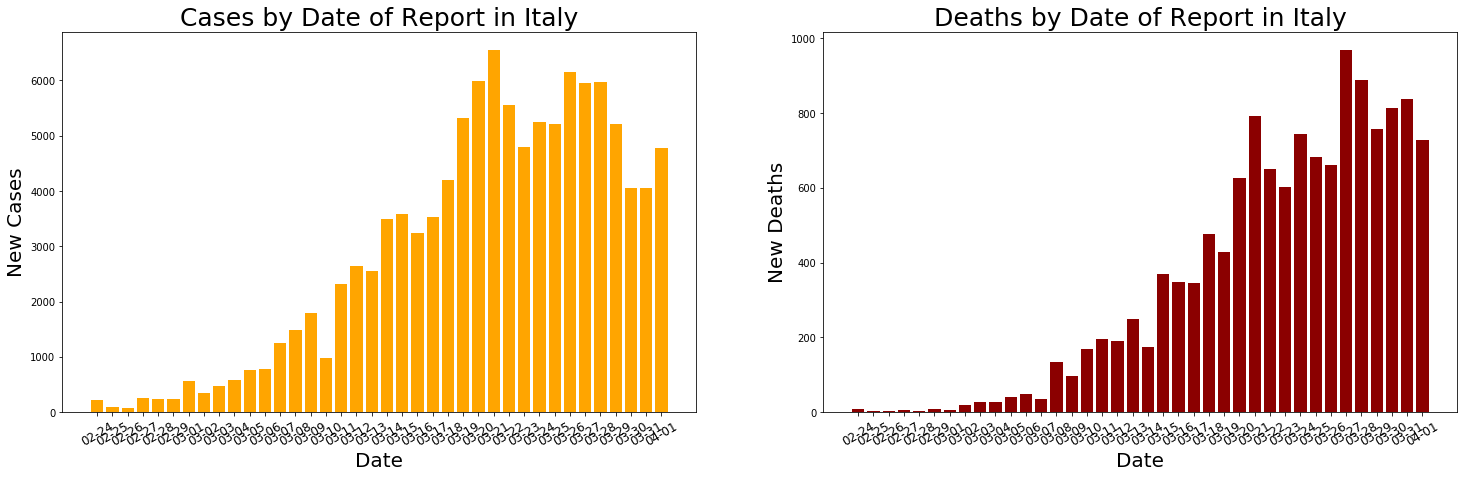

In [5]:
fig = plt.figure(figsize=(25, 7))

# Create a unique x axis dates list
x_axis_list = [str(d).replace("2020-", "").replace(" 18:00:00", "").replace(" 17:00:00", "") for idx, d in enumerate(df_naz.data)]

ax0 = plt.subplot(1, 2, 1)

ax0.bar(x_axis_list, df_naz.nuovi_positivi, color="orange")
ax0.set_title("Cases by Date of Report in Italy", fontsize=25)
ax0.set_xlabel("Date", fontsize=20)
ax0.set_ylabel("New Cases", fontsize=20)

plt.xticks(rotation=30, fontsize=12)

ax1 = plt.subplot(1, 2, 2)

# Create a new columns for new Death
new_deaths = []
for idx, death in enumerate(df_naz.deceduti):
    if idx == 0:
        new_deaths.append(death)
        old_deaths = death
    else:
        new_deaths.append(death-old_deaths)
        old_deaths = death

df_naz["nuovi_deceduti"] = new_deaths

ax1.bar(x_axis_list, df_naz.nuovi_deceduti, color="darkred")
ax1.set_title("Deaths by Date of Report in Italy", fontsize=25)
ax1.set_xlabel("Date", fontsize=20)
ax1.set_ylabel("New Deaths", fontsize=20)

plt.xticks(rotation=30, fontsize=12)

fig.savefig(FIGS_PATH+"cases-and-deaths-by-date-of-report-covid-19-in-italy.png")
plt.show()

## Analysis by Regions of Italy

### Distribution of Cases in the Italian Regions - Pie Chart

In [17]:
fig = px.sunburst(df_reg_latest.sort_values(by='totale_casi', ascending=False).reset_index(drop=True), 
                 path=["denominazione_regione"], values="totale_casi", height=650,
                 title='Distribution of Cases in the Italian Regions',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'

# distribution-of-cases-italian-regions-covid-19
fig.show()

### Deaths vs. Actives in Italy due to COVID-19

In [7]:
fig = px.scatter(df_reg_latest.sort_values('deceduti', ascending=False), 
                 x='totale_positivi', y='deceduti', color='denominazione_regione', 
                 size='totale_positivi', 
                 height=650,
                 text='denominazione_regione', title='Deaths vs. Actives')
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_rangeslider_visible=True)

# deaths-vs.-actives-in-italy-due-to-covid-19
fig.show()

### Cases in the Italian Regions

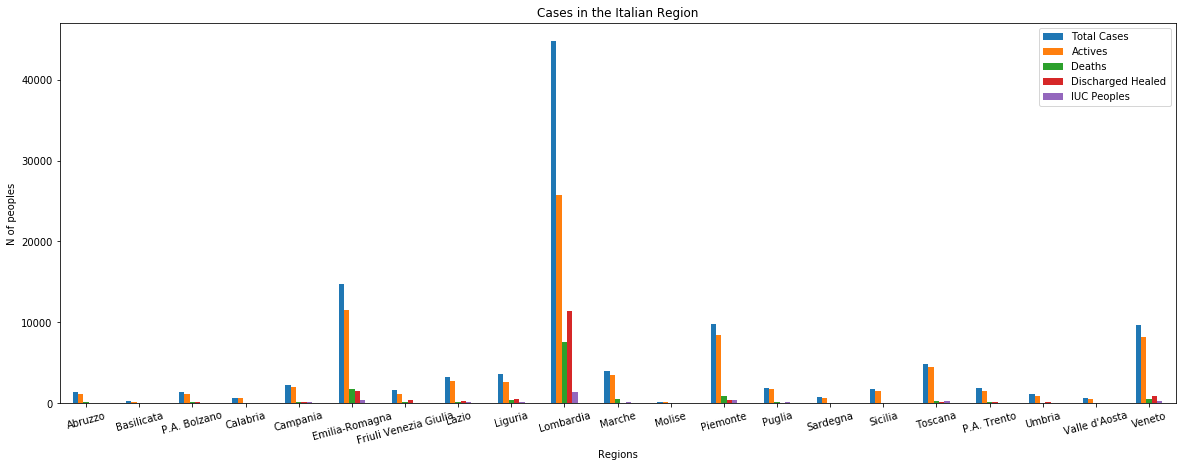

In [8]:
df_reg_tmp = pd.DataFrame({"Total Cases": df_reg_latest.totale_casi,
                           "Actives": df_reg_latest.totale_positivi,
                           "Deaths": df_reg_latest.deceduti,
                           "Discharged Healed": df_reg_latest.dimessi_guariti,
                           "IUC Peoples": df_reg_latest.terapia_intensiva})
df_reg_tmp.index = df_reg_latest.denominazione_regione

df_reg_tmp.plot.bar(figsize=(20, 7))
plt.title("Cases in the Italian Region")
plt.xlabel("Regions")
plt.ylabel("N of peoples")
plt.xticks(rotation=15)

plt.savefig(FIGS_PATH+"regions/cases-in-the-italian-regions-covid-19.png")
plt.show()

### Cases in the Italian Region (exluding 'Lomabrdia' & 'Emilia Romagna')

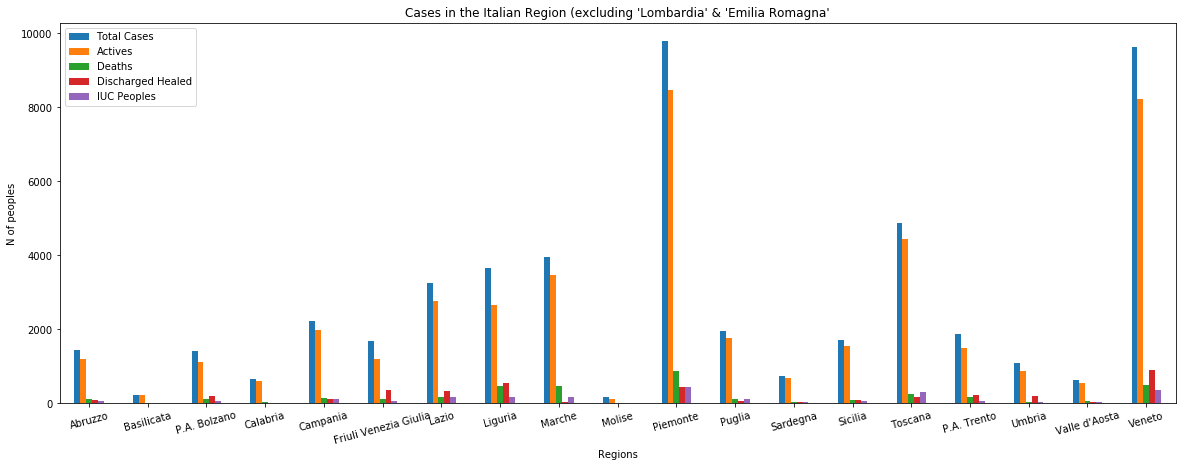

In [10]:
df_reg_tmp = pd.DataFrame({"Total Cases": df_reg_latest.totale_casi,
                           "Actives": df_reg_latest.totale_positivi,
                           "Deaths": df_reg_latest.deceduti,
                           "Discharged Healed": df_reg_latest.dimessi_guariti,
                           "IUC Peoples": df_reg_latest.terapia_intensiva})
df_reg_tmp.index = df_reg_latest.denominazione_regione

# Remove 'Lombardia' & 'Emilia Romagna'
df_reg_tmp.drop("Lombardia", axis=0, inplace=True)
df_reg_tmp.drop("Emilia-Romagna", axis=0, inplace=True)

df_reg_tmp.plot.bar(figsize=(20, 7))
plt.title("Cases in the Italian Region (excluding 'Lombardia' & 'Emilia Romagna'")
plt.xlabel("Regions")
plt.ylabel("N of peoples")
plt.xticks(rotation=15)

plt.savefig(FIGS_PATH+"regions/cases-in-the-italian-regions-covid-19-excluding-lombardia-and-emiliaromagna.png")
plt.show()

## Trend in the Regions of Italy - Time Evolution

### Deaths by Region in Italy due to COVID-19

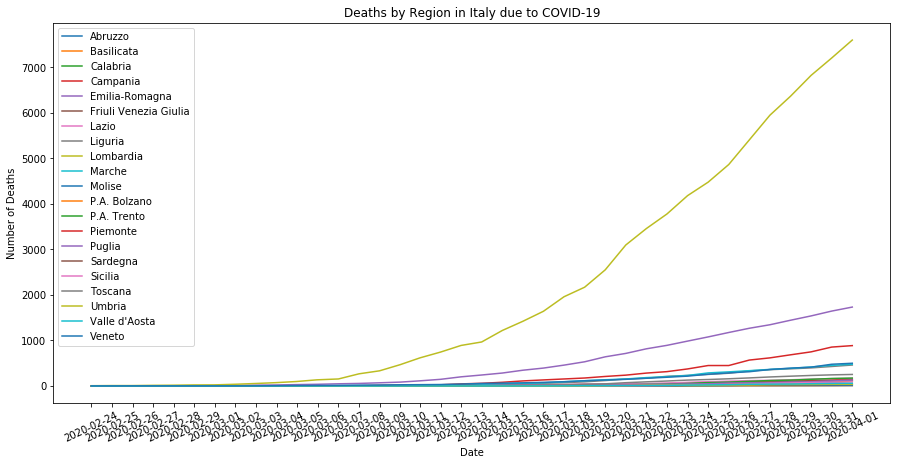

In [11]:
fig, ax = plt.subplots(figsize=(15, 7))

for reg in np.unique(df_reg.denominazione_regione):
  ax.plot(df_reg.data[df_reg.denominazione_regione == reg], df_reg.deceduti[df_reg.denominazione_regione == reg], label=reg)
  
ax.legend()
ax.set(title="Deaths by Region in Italy due to COVID-19",
       xlabel="Date",
       ylabel="Number of Deaths")

# Create a unique xticks dates list
xticks_list = [d for idx, d in enumerate(df_naz.data)]
plt.xticks(xticks_list, rotation=25)

fig.savefig(FIGS_PATH+"regions/deaths-by-region-in-italy-due-to-covid-19.png")
plt.show()

### Deaths by Region in Italy due to COVID-19 (excluding 'Lombardia' & 'Emilia Romagna')

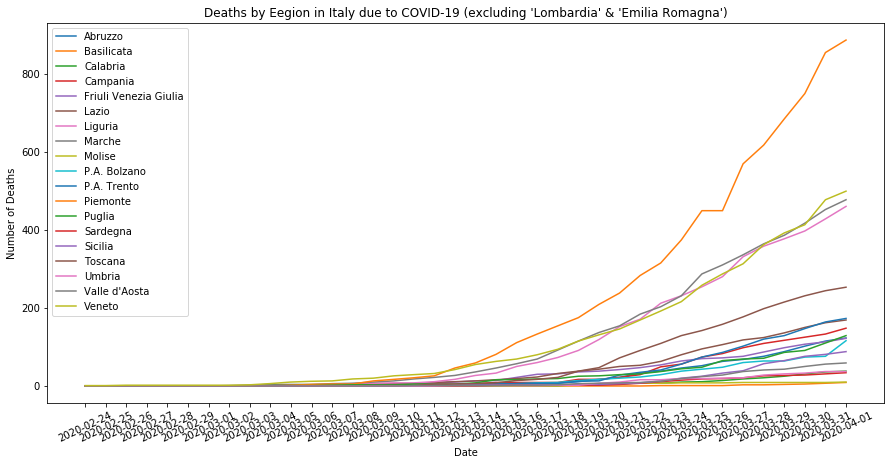

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))

for reg in np.unique(df_reg.denominazione_regione):
  if reg != "Lombardia" and reg != "Emilia-Romagna":
    ax.plot(df_reg.data[df_reg.denominazione_regione == reg], df_reg.deceduti[df_reg.denominazione_regione == reg], label=reg)

ax.legend()
ax.set(title="Deaths by Eegion in Italy due to COVID-19 (excluding 'Lombardia' & 'Emilia Romagna')",
       xlabel="Date",
       ylabel="Number of Deaths")

# Create a unique xticks dates list
xticks_list = [d for idx, d in enumerate(df_naz.data)]
plt.xticks(xticks_list, rotation=25)

fig.savefig(FIGS_PATH+"regions/deaths-by-region-in-italy-due-to-covid-19-excluding-lombardia-and-emiliaromagna.png")
plt.show()

#### Last Update 

In [13]:
import datetime as dt
dt_string = dt.datetime.now().strftime("%d/%m/%Y-%H:%M:%S")
print(f"Kernel last updated: {dt_string}")

Kernel last updated: 01/04/2020-22:06:39
